## Predicting Energy consumption in NYC

A Data-Driven Approach to Sustainable Urban Living

Datasets: https://data.cityofnewyork.us/Environment/NYC-Building-Energy-and-Water-Data-Disclosure-for-/5zyy-y8am/about_data / https://www.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page


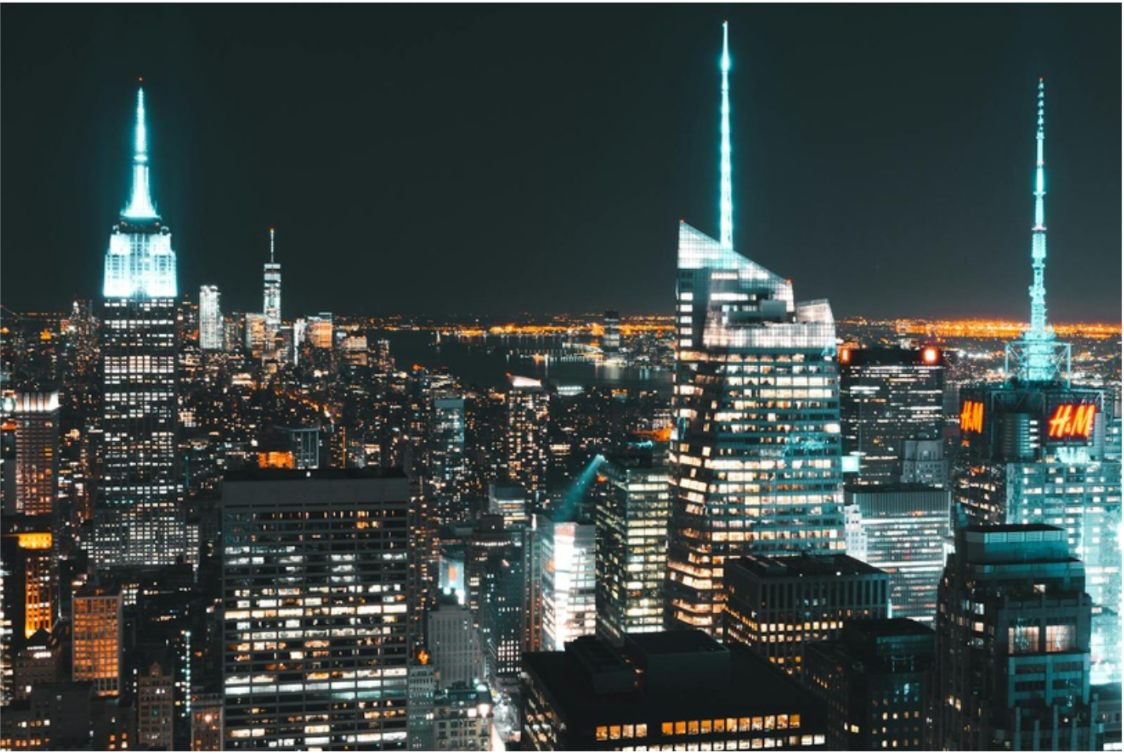

## Business Understanding:

Buildings are the major contributor to world  energy consumption and greenhouse gas emission 
The high proportion of energy consumed by buildings leads to major environmental problems, causing climate change, and air pollution among others[1]. 

It's impacting our city's urban planning by the need to build energy infrastructure to support the building energy needs. 
This initiative revolves around the comprehensive analysis and prediction of energy consumption in New York City buildings, aligning closely with broader business motivations and objectives. The project aims to deliver valuable outcomes for a diverse range of stakeholders, including urban planners, environmentalists, the New York State Government, real estate investors, and policymakers.

Our primary business objectives are to offer useful insights that directly impact energy-efficient building practices, influence the creation of policies supporting sustainable living, and lead to cost savings for individuals and businesses. By utilizing advanced machine learning models to predict energy efficiency trends, our project aims to guide decisions that optimize resource usage, reduce environmental impact, and support economic development. Ultimately, we want to contribute to the overall resilience of the community.

The alignment of business motivations with model objectives ensures that the predictions and insights from our models have practical implications, supporting broader goals such as promoting sustainability, informing policy decisions, and creating a resilient and energy-efficient urban environment.

[1] Ref:&nbsp;CO2 emissions from buildings and construction hit new high, leaving sector off track to decarbonize by 2050: UN&nbsp;

## Project’s Technical Objectives
In this project, our primary goal is to assess the ability to predict total energy consumption in buildings using only indirect factors, such as building size, occupancy, and other related parameters. By employing advanced machine learning models, we aim to understand how well these non-direct energy measures can serve as reliable predictors for overall energy usage. Initially, bigger buildings, taller buildings, and higher occupancy all show positive correlations. But the question arises: how well can we predict these factors?

Our secondary objective is to identify buildings that deviate significantly from our predictions. Buildings consuming more energy than anticipated may be considered inefficient, prompting the exploration of recommendations for energy reduction. On the other hand, identifying buildings that consume less energy than predicted provides an opportunity for further study. Analyzing these energy-efficient buildings can yield insights into practices that contribute to lower consumption, ultimately allowing us to develop targeted recommendations for broader energy efficiency improvements


## Data Understanding

This project leverages two key datasets: The NYC Building Energy for Local Law 84 (2023-Present), providing information on energy usage for buildings exceeding 50,000 square feet, including details such as year built, address, and occupancy. Additionally, the Primary Land Use Tax Lot Output (PLUTO™) data file offers comprehensive land use and geographic data, featuring columns like address, number of buildings, number of floors, etc. The selection of these datasets are based on their extensive information content, with PLUTO™ comprising over 800,000 rows and 92 columns, and the NYC dataset containing 30,000 rows and 254 columns. Directly sourced from official websites, these datasets encompass diverse features, including building energy consumption, water usage, land use, zoning, building characteristics, and geographic information. Our study stands out for its unique approach to integrating these datasets, potentially offering valuable insights into the field of urban energy efficiency analysis.


In [1]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score,make_scorer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

from sklearn.model_selection import GridSearchCV



## Data exploration

* The Primary Land Use Tax Lot Output (PLUTO™) dataset

In [2]:
#Reading The Primary Land Use Tax Lot Output (PLUTO™) dataset
df1=pd.read_csv('data/pluto_23v3_1.csv',low_memory=False)

In [3]:
#checkiing the shape()
df1.shape

(858598, 92)

In [4]:
#checking the first 5 rows
df1.head()

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,BX,5595,94,210.0,2013200.0,2.013201e+10,132.0,5008.0,8.0,13.0,...,NaN,NaN,1,NaN,NaN,23v3.1,NaN,40.814154,-73.820936,NaN
1,BX,5593,98,210.0,2013200.0,2.013201e+10,132.0,5006.0,8.0,13.0,...,NaN,NaN,1,NaN,1.0,23v3.1,NaN,40.814429,-73.819393,NaN
2,BX,5593,106,210.0,2013200.0,2.013201e+10,132.0,5006.0,8.0,13.0,...,NaN,NaN,1,NaN,1.0,23v3.1,NaN,40.814896,-73.819695,NaN
3,BX,5593,103,210.0,2013200.0,2.013201e+10,132.0,5006.0,8.0,13.0,...,NaN,NaN,1,1.0,1.0,23v3.1,NaN,40.814706,-73.819580,NaN
4,BX,5593,101,210.0,2013200.0,2.013201e+10,132.0,5006.0,8.0,13.0,...,NaN,NaN,1,1.0,1.0,23v3.1,NaN,40.814577,-73.819504,NaN


In [5]:
df1.isna().sum()

borough           0
block             0
lot               0
cd              943
bct2020         997
              ...  
version           0
dcpedited    816447
latitude       1049
longitude      1049
notes        858598
Length: 92, dtype: int64

In [6]:
#checking the columns info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858598 entries, 0 to 858597
Data columns (total 92 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               858598 non-null  object 
 1   block                 858598 non-null  int64  
 2   lot                   858598 non-null  int64  
 3   cd                    857655 non-null  float64
 4   bct2020               857601 non-null  float64
 5   bctcb2020             857601 non-null  float64
 6   ct2010                857601 non-null  float64
 7   cb2010                857601 non-null  float64
 8   schooldist            856929 non-null  float64
 9   council               857513 non-null  float64
 10  zipcode               856914 non-null  float64
 11  firecomp              856910 non-null  object 
 12  policeprct            856924 non-null  float64
 13  healthcenterdistrict  856924 non-null  float64
 14  healtharea            856924 non-null  float64
 15  

In [7]:
# Identify columns with data type 'object'
object_columns = df1.select_dtypes(include='object').columns
num_object_columns = len(object_columns)

# Identify columns with data type 'float' or 'int'
numeric_columns = df1.select_dtypes(include=['float', 'int']).columns
num_numeric_columns = len(numeric_columns)

# Print the counts
print(f"Number of columns with data type 'object': {num_object_columns}")
print(f"Number of columns with data type 'float' or 'int': {num_numeric_columns}")

Number of columns with data type 'object': 28
Number of columns with data type 'float' or 'int': 64


In [8]:
# Extract the specified columns
selected_columns = ['borough','block', 'zipcode', 'address', 'bldgarea', 'landuse', 'lotarea', 'comarea', 'resarea', 'bldgclass']
exp_df1 = df1[selected_columns]

# Display the first few rows of the selected columns
exp_df1.head()

,borough,block,zipcode,address,bldgarea,landuse,lotarea,comarea,resarea,bldgclass
0,BX,5595,10465.0,2737 SCHURZ AVENUE,1800.0,1.0,3000.0,0.0,1800.0,B1
1,BX,5593,10465.0,182 BRINSMADE AVENUE,2838.0,1.0,4600.0,0.0,1892.0,B1
2,BX,5593,10465.0,196 BRINSMADE AVENUE,2322.0,1.0,2342.0,0.0,1548.0,B1
3,BX,5593,10465.0,190 BRINSMADE AVENUE,2838.0,1.0,2742.0,0.0,1892.0,B1
4,BX,5593,10465.0,186 BRINSMADE AVENUE,2838.0,1.0,2742.0,0.0,1892.0,B1


In [9]:
#checking the columns
exp_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858598 entries, 0 to 858597
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   borough    858598 non-null  object 
 1   block      858598 non-null  int64  
 2   zipcode    856914 non-null  float64
 3   address    858240 non-null  object 
 4   bldgarea   858215 non-null  float64
 5   landuse    855837 non-null  float64
 6   lotarea    857622 non-null  float64
 7   comarea    811216 non-null  float64
 8   resarea    811216 non-null  float64
 9   bldgclass  858241 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 65.5+ MB


In [10]:
#checking for missing values in df1
df1.isna().sum()

borough           0
block             0
lot               0
cd              943
bct2020         997
              ...  
version           0
dcpedited    816447
latitude       1049
longitude      1049
notes        858598
Length: 92, dtype: int64

In [11]:
# Calculate value counts for each column in exploration_df
for column in exp_df1.columns:
    print(f"Value counts for {column}:\n{exp_df1[column].value_counts()}\n")

Value counts for borough:
borough
QN    324534
BK    276470
SI    125252
BX     89563
MN     42779
Name: count, dtype: int64

Value counts for block:
block
2925     577
7405     539
4452     536
7422     485
869      412
        ... 
13378      1
15327      1
15922      1
12882      1
0          1
Name: count, Length: 13959, dtype: int64

Value counts for zipcode:
zipcode
10314.0    21009
10312.0    19455
11234.0    19391
10306.0    17035
11236.0    14682
           ...  
10122.0        1
10165.0        1
10170.0        1
10176.0        1
10152.0        1
Name: count, Length: 215, dtype: int64

Value counts for address:
address
500 WEST 18TH STREET    203
 HYLAN BOULEVARD        167
 ARTHUR KILL ROAD       154
 AMBOY ROAD             153
 RICHMOND TERRACE       144
                       ... 
261 WEST 113 STREET       1
253 WEST 113 STREET       1
227 WEST 113 STREET       1
267 WEST 113 STREET       1
342 AMSTERDAM AVENUE      1
Name: count, Length: 828131, dtype: int64

Value counts 

In [12]:
# Exploring the address column
df1['address'].value_counts()

address
500 WEST 18TH STREET    203
 HYLAN BOULEVARD        167
 ARTHUR KILL ROAD       154
 AMBOY ROAD             153
 RICHMOND TERRACE       144
                       ... 
261 WEST 113 STREET       1
253 WEST 113 STREET       1
227 WEST 113 STREET       1
267 WEST 113 STREET       1
342 AMSTERDAM AVENUE      1
Name: count, Length: 828131, dtype: int64

## Reading NYC Building energy

In [13]:
#reading NYC Building energy
df2=pd.read_csv('data/NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240129.csv',low_memory=False)

In [14]:
#checking the shape
df2.shape

(30485, 254)

In [15]:
#Reading df2.info()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display DataFrame information in a structured format
print(f"<class 'pandas.core.frame.DataFrame'>")
print(f"RangeIndex: {df2.shape[0]} entries, 0 to {df2.shape[0] - 1}")
print("Data columns (total %d columns):" % df2.shape[1])

# Loop through columns and display information for each
for i, column in enumerate(df2.columns):
    print(f" #   {i:2d} {column:20s} {df2[column].count():>13d} non-null  {df2[column].dtype.name:<8s}")

# Display memory usage information
print(f"dtypes: {df2.dtypes.value_counts().to_string()}")
print(f"memory usage: {df2.memory_usage(deep=True).sum() / (1024**2):.1f}+ MB")

# Reset display options to default values
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30485 entries, 0 to 30484
Data columns (total 254 columns):
 #    0 Report Year                  30485 non-null  int64   
 #    1 Property ID                  30485 non-null  int64   
 #    2 Property Name                30485 non-null  object  
 #    3 Parent Property ID           30485 non-null  object  
 #    4 Parent Property Name         30485 non-null  object  
 #    5 Year Ending                  30485 non-null  object  
 #    6 NYC Borough, Block and Lot (BBL)         30485 non-null  object  
 #    7 NYC Building Identification Number (BIN)         30485 non-null  object  
 #    8 Address 1                    30485 non-null  object  
 #    9 City                         30485 non-null  object  
 #   10 Postal Code                  30485 non-null  object  
 #   11 Primary Property Type - Self Selected         30485 non-null  object  
 #   12 Primary Property Type - Portfolio Manager-Calculated         30485 non-null  object  
 # 

 #   167 Movie Theater - Gross Floor Area (ft²)         30485 non-null  object  
 #   168 Manufacturing/Industrial Plant - Gross Floor Area (ft²)         30485 non-null  object  
 #   169 Multifamily Housing - Government Subsidized Housing         30485 non-null  object  
 #   170 Multifamily Housing - Gross Floor Area (ft²)         30485 non-null  object  
 #   171 Multifamily Housing - Number of Bedrooms         30485 non-null  object  
 #   172 Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)         30485 non-null  object  
 #   173 Multifamily Housing - Number of Laundry Hookups in All Units         30485 non-null  object  
 #   174 Multifamily Housing - Number of Laundry Hookups in Common Area(s)         30485 non-null  object  
 #   175 Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories)         30485 non-null  object  
 #   176 Multifamily Housing - Percent That Can Be Cooled         30485 non-null  obje

In [16]:
#checking the head of the dataset 
df2.head()

,Report Year,Property ID,Property Name,Parent Property ID,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,...,Number of Active IT Meters,Report Generation Date,Report Submission Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,2022,6414946,58-01 Grand Avenue,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4026780001,4059918,58-01 Grand Avenue,Queens,...,0,04/25/2023 11:01:44 AM,04/25/2023 11:02:08 AM,QUEENS,40.719667,-73.911197,405.0,30.0,531.0,QN0501
1,2022,9793770,1870 Pelham Parkway South,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,2042500026,2047795,1870 Pelham Parkway South,Bronx,...,0,03/11/2023 02:00:50 PM,03/11/2023 02:01:08 PM,BRONX,40.855488,-73.830726,210.0,13.0,300.0,BX1003
2,2022,10177418,Central Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4157040040,4300145,2011 Mott Ave,Far Rockaway,...,0,04/14/2023 03:47:19 PM,04/14/2023 03:47:37 PM,QUEENS,40.604320,-73.753009,414.0,31.0,100803.0,QN1401
3,2022,13511507,215 East 99th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,1016490009,1052383,215 East 99th Street,New York,...,0,03/12/2023 03:54:23 PM,03/12/2023 03:54:43 PM,MANHATTAN,40.786963,-73.947537,111.0,8.0,164.0,MN1101
4,2022,14009907,23-25 31 Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4008350027,4017180,23-25 31 Street,Queens,...,0,04/28/2023 02:22:48 PM,04/28/2023 02:23:30 PM,QUEENS,40.773768,-73.913573,401.0,22.0,115.0,QN0101


In [17]:
# Identify columns with data type 'object'
object_columns = df2.select_dtypes(include='object').columns
num_object_columns = len(object_columns)

# Identify columns with data type 'float' or 'int'
numeric_columns = df2.select_dtypes(include=['float', 'int']).columns
num_numeric_columns = len(numeric_columns)

# Print the counts
print(f"Number of columns with data type 'object': {num_object_columns}")
print(f"Number of columns with data type 'float' or 'int': {num_numeric_columns}")

Number of columns with data type 'object': 233
Number of columns with data type 'float' or 'int': 19


In [18]:
# Calculate value counts for each column in df2
for column in df2.columns:
    print(f"Value counts for {column}:\n{df2[column].value_counts()}\n")

Value counts for Report Year:
Report Year
2022    30485
Name: count, dtype: int64

Value counts for Property ID:
Property ID
3001555     2
26713705    2
6670939     2
20023408    2
6808818     2
           ..
15527410    1
15526842    1
7468565     1
18196163    1
2681034     1
Name: count, Length: 30332, dtype: int64

Value counts for Property Name:
Property Name
Cross Bronx Pres LLC - Baychester (2166bay)    4
Main Building                                  3
University Center                              3
Cross Bronx Pres LLC - Murphy (2166murph)      3
150 West 26th Street                           3
                                              ..
2629 Sedgwick Avenue                           1
2323 Creston Avenue                            1
2239-41 Creston Avenue                         1
Putnam Avenue Cluster - 680 Jefferson Ave      1
Newlo Realty Company                           1
Name: count, Length: 30203, dtype: int64

Value counts for Parent Property ID:
Parent Property

Value counts for 3rd Largest Property Use Type:
3rd Largest Property Use Type
Not Available                 27715
Retail Store                    444
Parking                         401
Office                          261
Restaurant                      215
                              ...  
Energy/Power Station              1
Ambulatory Surgical Center        1
Single-Family Home                1
Fire Station                      1
Police Station                    1
Name: count, Length: 67, dtype: int64

Value counts for 3rd Largest Property Use Type - Gross Floor Area (ft²):
3rd Largest Property Use Type - Gross Floor Area (ft²)
Not Available    27715
0                  132
1000                75
5000                62
2000                53
                 ...  
52621                1
7083                 1
3917                 1
5850                 1
9658                 1
Name: count, Length: 1743, dtype: int64

Value counts for Year Built:
Year Built
1931    1120
1920    1091

Value counts for Source Energy Use (kBtu):
Source Energy Use (kBtu)
Not Available    1595
0                  71
70621654.1          4
2232026.3           3
1750496.6           3
                 ... 
3666866             1
4906616.3           1
6885862.3           1
10047133.7          1
3046923.6           1
Name: count, Length: 28295, dtype: int64

Value counts for Weather Normalized Source Energy Use (kBtu):
Weather Normalized Source Energy Use (kBtu)
Not Available    3035
0                  58
2222345.8           3
71014375.2          3
1707357.4           3
                 ... 
1911148.8           1
4465230.2           1
14517969.9          1
1430020.7           1
3046923.6           1
Name: count, Length: 27076, dtype: int64

Value counts for Fuel Oil #1 Use (kBtu):
Fuel Oil #1 Use (kBtu)
Not Available    30478
430900               1
1459751.6            1
3501062.4            1
0                    1
9384445.6            1
1807000              1
2085166.8            1
Name: coun

Value counts for Total (Location-Based) GHG Emissions (Metric Tons CO2e):
Total (Location-Based) GHG Emissions (Metric Tons CO2e)
0                1477
Not Available     203
218.7              16
179.6              15
148.3              14
                 ... 
3126.7              1
2657.7              1
1019.8              1
865.1               1
554.6               1
Name: count, Length: 11005, dtype: int64

Value counts for Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²):
Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)
0       1536
4.6      716
4.8      693
4.7      691
4.5      664
        ... 
26.9       1
27.5       1
18.1       1
57.3       1
27.1       1
Name: count, Length: 435, dtype: int64

Value counts for Direct GHG Emissions (Metric Tons CO2e):
Direct GHG Emissions (Metric Tons CO2e)
0                3348
Not Available     156
0.1                49
0.2                23
1.5                22
                 ... 
395.7               1
565.1        

Value counts for Automobile Dealership - Gross Floor Area (ft²):
Automobile Dealership - Gross Floor Area (ft²)
Not Available    30455
60485                1
66728                1
34840                1
34746                1
35350                1
37610                1
35522                1
75000                1
91256                1
72460                1
47245                1
147187               1
143934               1
25000                1
155257               1
243960               1
184063               1
30000                1
45696                1
135000               1
25942                1
68932                1
2903                 1
44200                1
137456               1
8331                 1
10967                1
13412                1
36581                1
38000                1
Name: count, dtype: int64

Value counts for Bank Branch - Gross Floor Area (ft²):
Bank Branch - Gross Floor Area (ft²)
Not Available    30205
3000                10
5000      

Value counts for Medical Office - Number of Computers:
Medical Office - Number of Computers
Not Available    29818
10                  40
20                  20
4                   18
2                   17
                 ...  
9.95                 1
84.17                1
31.49                1
21.19                1
134                  1
Name: count, Length: 335, dtype: int64

Value counts for Medical Office - Number of MRI Machines:
Medical Office - Number of MRI Machines
Not Available    29818
0                  623
1                   15
2                   11
3                    7
0.28                 3
6                    3
4                    3
5                    1
30                   1
Name: count, dtype: int64

Value counts for Medical Office - Number of Workers on Main Shift:
Medical Office - Number of Workers on Main Shift
Not Available    29818
5                   26
10                  24
20                  22
2                   21
                 ...  
198   

Value counts for Supermarket/Grocery - Number of Walk-in Refrigeration/Freezer Units:
Supermarket/Grocery - Number of Walk-in Refrigeration/Freezer Units
Not Available    30084
0                   43
1                   39
2                   37
3                   28
                 ...  
15.25                1
1.25                 1
33.85                1
0.53                 1
15.27                1
Name: count, Length: 133, dtype: int64

Value counts for Supermarket/Grocery - Number of Open or Closed Refrigeration/Freezer Units:
Supermarket/Grocery - Number of Open or Closed Refrigeration/Freezer Units
Not Available    30084
0                   53
2                   23
3                   23
5                   18
                 ...  
1.82                 1
149                  1
117                  1
110                  1
61.06                1
Name: count, Length: 130, dtype: int64

Value counts for Wholesale Club/Supercenter- Gross Floor Area (ft²):
Wholesale Club/Supercen

Value counts for Last Modified Date - Property:
Last Modified Date - Property
04/07/2023    3425
04/24/2023    1726
05/01/2023    1339
04/30/2023    1130
04/27/2023    1123
              ... 
03/25/2021       1
04/07/2022       1
05/07/2023       1
07/15/2023       1
06/07/2022       1
Name: count, Length: 345, dtype: int64

Value counts for Last Modified Date - Electric Meters:
Last Modified Date - Electric Meters
03/09/2023    1552
04/19/2023    1381
03/03/2023    1377
03/16/2023    1296
03/15/2023    1269
              ... 
07/14/2022       1
03/14/2022       1
07/24/2020       1
11/01/2022       1
03/08/2022       1
Name: count, Length: 324, dtype: int64

Value counts for Last Modified Date - Gas Meters:
Last Modified Date - Gas Meters
04/07/2023    5151
04/20/2023    1537
04/30/2023     892
04/03/2023     840
03/07/2023     785
              ... 
09/22/2022       1
06/22/2020       1
03/25/2022       1
03/04/2018       1
08/06/2020       1
Name: count, Length: 398, dtype: int64

V

In [19]:
# Count the missing values in each column of df2
df2.isna().sum()

Report Year                                     0
Property ID                                     0
Property Name                                   0
Parent Property ID                              0
Parent Property Name                            0
                                             ... 
Longitude                                    1101
Community Board                              1100
Council District                             1100
Census Tract (2020)                          1100
Neighborhood Tabulation Area (NTA) (2020)    1100
Length: 254, dtype: int64

In [20]:
# Convert column names to lowercase
df2.columns = [col.lower() for col in df2.columns]

#Convert the data set into lower case
df2 = df2.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df2.head()

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_27571/1536913436.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,report year,property id,property name,parent property id,parent property name,year ending,"nyc borough, block and lot (bbl)",nyc building identification number (bin),address 1,city,...,number of active it meters,report generation date,report submission date,borough,latitude,longitude,community board,council district,census tract (2020),neighborhood tabulation area (nta) (2020)
0,2022,6414946,58-01 grand avenue,not applicable: standalone property,not applicable: standalone property,12/31/2022,4026780001,4059918,58-01 grand avenue,queens,...,0,04/25/2023 11:01:44 am,04/25/2023 11:02:08 am,queens,40.719667,-73.911197,405.0,30.0,531.0,qn0501
1,2022,9793770,1870 pelham parkway south,not applicable: standalone property,not applicable: standalone property,12/31/2022,2042500026,2047795,1870 pelham parkway south,bronx,...,0,03/11/2023 02:00:50 pm,03/11/2023 02:01:08 pm,bronx,40.855488,-73.830726,210.0,13.0,300.0,bx1003
2,2022,10177418,central building,not applicable: standalone property,not applicable: standalone property,12/31/2022,4157040040,4300145,2011 mott ave,far rockaway,...,0,04/14/2023 03:47:19 pm,04/14/2023 03:47:37 pm,queens,40.604320,-73.753009,414.0,31.0,100803.0,qn1401
3,2022,13511507,215 east 99th street,not applicable: standalone property,not applicable: standalone property,12/31/2022,1016490009,1052383,215 east 99th street,new york,...,0,03/12/2023 03:54:23 pm,03/12/2023 03:54:43 pm,manhattan,40.786963,-73.947537,111.0,8.0,164.0,mn1101
4,2022,14009907,23-25 31 street,not applicable: standalone property,not applicable: standalone property,12/31/2022,4008350027,4017180,23-25 31 street,queens,...,0,04/28/2023 02:22:48 pm,04/28/2023 02:23:30 pm,queens,40.773768,-73.913573,401.0,22.0,115.0,qn0101


# Summary: 
Exploring df1, it contains only 10 out of 92 columns with complete information. It has 28 columns of type object and 64 of type float or integer. Key columns of interest include borough, block, zipcode, address, building areas, land use, lot area, commercial area, residential area, building class, etc. A subset dataset, exp_df1, has been created for further exploration, revealing opportunities for data normalization such as converting strings to lowercase, particularly in the address column. Understanding the features and addressing the huge amount of zeros in columns like building area, commercial area, and residential area are essential steps.

df2 contains 233 columns with data type ‘object’ and 19 with data type float or integer. Key columns of interest include Property Id, Year Ending, NYC Borough, block and lot, City, Postal Code, Address 1, Primary Property Type, etc. Certain columns have missing values, and a value count has been conducted to explore each column.

## Merging using address columns in both datasets

Before creating a merged dataset named df_a_m using the address column as a key, normalization steps will be taken, converting all string values to lowercase. Manual cleaning will be applied to key columns for better integration.

In [21]:
#Convert the data set into lower case
df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x);

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_27571/725434735.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x);


In [22]:
#reviewing the address column for df1
df1[['address']]

,address
0,2737 schurz avenue
1,182 brinsmade avenue
2,196 brinsmade avenue
3,190 brinsmade avenue
4,186 brinsmade avenue
...,...
858593,18 kissam avenue
858594,jewett avenue
858595,40 holcomb avenue
858596,holden boulevard


In [23]:
# Manual Cleaning of df1 address
df1['address'] = df1['address'].str.replace('-', '')  # Remove '-'
df1['address'] = df1['address'].str.split('/').str[0].str.strip() # Remove '/'

In [24]:
#exploring df2 address column
df2['address 1']

0               58-01 grand avenue
1        1870 pelham parkway south
2                    2011 mott ave
3             215 east 99th street
4                  23-25 31 street
                   ...            
30480             163 front street
30481              15 lisbon place
30482                113-25 14 ave
30483               450 zerega ave
30484         347-349 rider avenue
Name: address 1, Length: 30485, dtype: object

In [25]:
# Manual Cleaning of df2 address
df2['address 1'] = df2['address 1'].str.replace('-', '')  # Remove '-'
df2['address 1'] = df2['address 1'].str.split('/').str[0].str.strip()  # Remove '/'

In [26]:
#Merging both datasets
df_m2 = pd.merge(df2, df1, left_on='address 1', right_on='address')
df_m2.shape

(9723, 346)

In [27]:
#Merging both datasets
df_m = pd.merge(df1, df2, left_on='address', right_on='address 1')
df_m.shape

(9723, 346)

In [29]:
#Exporting our dataset into a csv file
df_m.to_csv('df_a_m.csv', index=False)